# Custom weighted mean visualisation

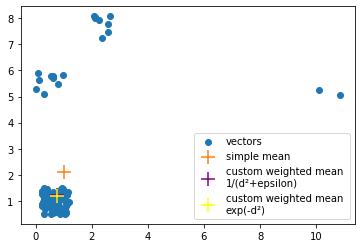

In [1]:
import numpy
import matplotlib.pyplot as plt

offset = numpy.array([[0.2 , 0.5] for _ in range(80)] + [[0 , 5] for _ in range(10)] + [[1.8 , 7.2] for _ in range(8)] + [[10 , 5] for _ in range(2)])
random_vectors = numpy.array([numpy.random.random(2).tolist() for _ in range(100)])
points = random_vectors + offset
mean = numpy.mean(points, axis=0)

w1 = [1 / (numpy.linalg.norm(p-mean)**2 + numpy.finfo(numpy.float32).tiny) for p in points]
w2 = [numpy.exp(- numpy.linalg.norm(p-mean)**2) for p in points]
super_mean1 = numpy.average(points, axis=0, weights=w1)
super_mean2 = numpy.average(points, axis=0, weights=w2)

plt.scatter([x for x,y in points], [y for x,y in points], label="vectors")
plt.scatter(mean[0], mean[1], label="simple mean", marker='+', s=200)
plt.scatter(super_mean1[0], super_mean1[1], label= "custom weighted mean \n1/(d²+epsilon)", marker='+', s=200, c="purple")
plt.scatter(super_mean2[0], super_mean2[1], label= "custom weighted mean \nexp(-d²)", marker='+', s=200, c="yellow")
plt.legend()
plt.show()